In [27]:
import sys
import os
sys.path.append(os.path.abspath("../.."))

In [28]:
from ml.data.data_util import create_spectrogram_transform, get_number_of_fourier_transform_bins, filter_spectrogram
from ml.data.vision import show_and_save_spectrogram_image
from pathlib import Path
import torchaudio
import torch
import torch.nn.functional as F
from torchaudio.functional import compute_deltas

In [87]:
pre_labeled_audio = Path('/home/dlonghi1_jm/.data/petal/pre-labeled/audio')

In [91]:
for emotion_path in pre_labeled_audio.iterdir():
    if not emotion_path.is_dir():
        continue 

    for audio_path in emotion_path.iterdir():
        try:
            waveform, sample_rate = torchaudio.load(audio_path)
            waveform = waveform + 1e-9
            n_fft = get_number_of_fourier_transform_bins(waveform)
            spectrogram_transform = create_spectrogram_transform(waveform)
            spectrogram = spectrogram_transform(waveform)
            if (spectrogram.min() < 0).item():
                print("negative value detected")
        except:
            print("error for path", audio_path)

error for path /home/dlonghi1_jm/.data/petal/pre-labeled/audio/sad/52d6a9cbf940b052ab340b6f709d1a0d.wav
error for path /home/dlonghi1_jm/.data/petal/pre-labeled/audio/neutral/0a997e323e518affd96370b3d5f79286.wav
error for path /home/dlonghi1_jm/.data/petal/pre-labeled/audio/angry/b4b35cc17f13356e6507843a51aa4763.wav
error for path /home/dlonghi1_jm/.data/petal/pre-labeled/audio/angry/5f32a1f1ddced03fbda6891b11f797b6.wav


In [74]:
waveform, sample_rate = torchaudio.load(audio_path)
waveform = waveform + 1e-9
n_fft = get_number_of_fourier_transform_bins(waveform)
spectrogram_transform = create_spectrogram_transform(waveform)
spectrogram = spectrogram_transform(waveform)
filtered_spectrogram = filter_spectrogram(spectrogram)

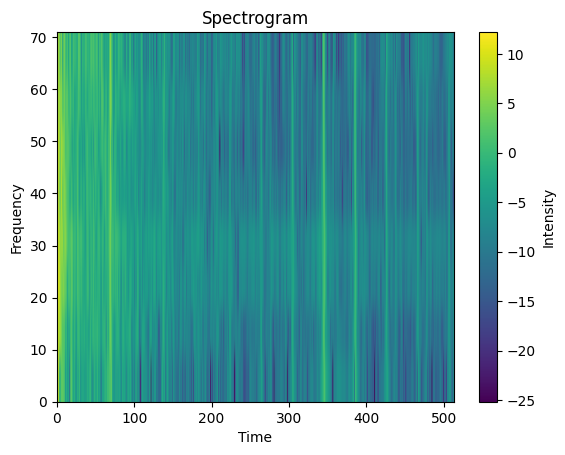

In [75]:
show_and_save_spectrogram_image(
    spectrogram=filtered_spectrogram,
    n_fft=n_fft,
    sample_rate=sample_rate,
    path=None
)

In [76]:
import numpy as np
def filter_spectrogram_test(spectrogram_tensor: torch.Tensor) -> np.ndarray:
    """
    Convert a spectrogram tensor to a log-scaled NumPy array, avoiding NaNs.

    Args:
        spectrogram_tensor (torch.Tensor): Spectrogram of shape (batch, freq, time).

    Returns:
        np.ndarray: Processed spectrogram with log scaling.
    """
    # Ensure non-negative values before applying log
    spectrogram_tensor = spectrogram_tensor.abs().add(1e-6).log2()  # Use log1p if values are very small

    # Convert to NumPy and transpose for plotting
    spectrogram_numpy = spectrogram_tensor[0, :, :].numpy().T

    # Replace -inf values with the smallest float
    infinity_filter = spectrogram_numpy != np.NINF
    filtered_spectrogram = np.where(
        infinity_filter,
        spectrogram_numpy,
        sys.float_info.min
    )

    return filtered_spectrogram

In [77]:
delta = compute_deltas(spectrogram)
filtered_delta = filter_spectrogram_test(delta)

In [86]:
(delta.min() < 0).item()

True

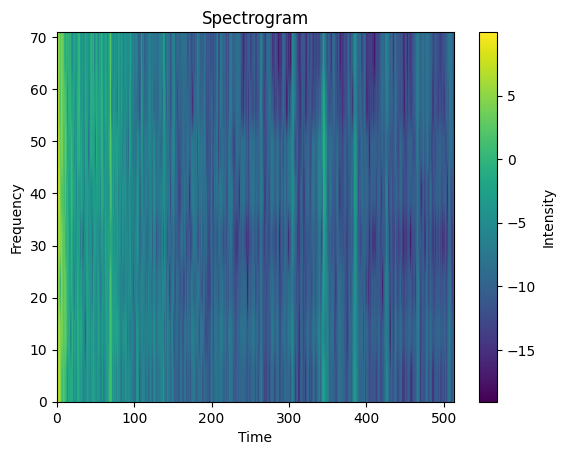

In [78]:
show_and_save_spectrogram_image(
    spectrogram=filtered_delta,
    n_fft=n_fft,
    sample_rate=sample_rate,
    path=None
)

In [79]:
delta_delta = compute_deltas(delta)
filtered_delta_delta = filter_spectrogram_test(delta_delta)

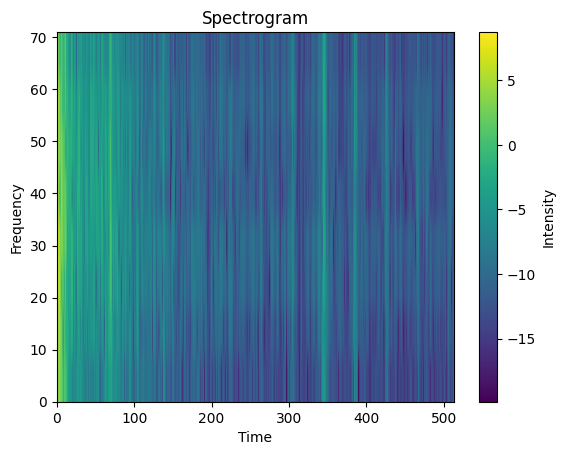

In [81]:
show_and_save_spectrogram_image(
    spectrogram=filtered_delta_delta,
    n_fft=n_fft,
    sample_rate=sample_rate,
    path=None
)

In [53]:
delta_n_fft = get_number_of_fourier_transform_bins(delta)
delta_transform = create_spectrogram_transform(delta)
delta_spectrogram = delta_transform(delta)
filtered_delta_spectrogram = filter_spectrogram(delta_spectrogram)

In [63]:
filtered_delta_spectrogram

array([[[ 19.078115  ,  16.217249  ,  -0.09545973, ..., -17.066263  ,
         -17.310238  , -26.935545  ],
        [ 17.072393  ,  14.5566    ,  -1.9350195 , ..., -19.833069  ,
         -20.333647  , -25.2273    ],
        [ 11.752512  ,   2.1333241 ,  -9.478553  , ..., -20.567595  ,
         -22.766855  , -34.89549   ],
        [ 12.613162  ,   9.455459  ,  -7.0679846 , ..., -23.671955  ,
         -26.511866  , -25.82837   ],
        [ 10.805304  ,   7.6870112 ,  -9.115389  , ..., -22.384914  ,
         -24.626078  , -25.66523   ]],

       [[ 18.55228   ,  15.399246  ,  -0.8186856 , ..., -17.853794  ,
         -16.604958  , -20.069714  ],
        [ 17.305216  ,  14.268581  ,  -1.9225427 , ..., -18.117628  ,
         -18.27672   , -20.29843   ],
        [ 13.721921  ,  10.94136   ,  -5.303417  , ..., -19.615278  ,
         -22.591213  , -21.650595  ],
        [  9.947336  ,   7.781156  , -10.030359  , ..., -21.458237  ,
         -26.141518  , -24.075752  ],
        [  8.438767  ,   1

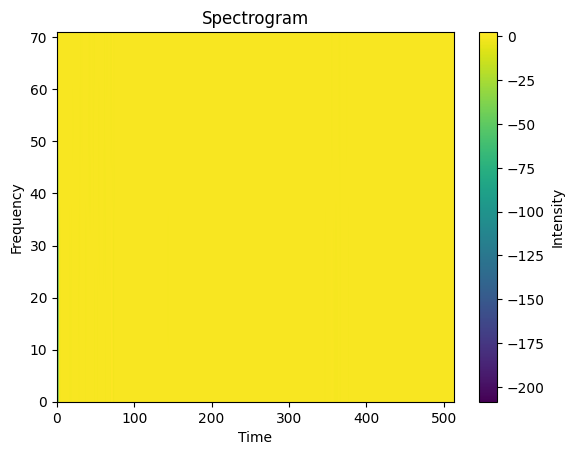

In [72]:
show_and_save_spectrogram_image(
    spectrogram=delta.squeeze().numpy().T,
    n_fft=delta_n_fft,
    sample_rate=sample_rate,
    path=None
)

In [43]:
waveform

tensor([[-0.1829, -0.1775, -0.2117,  ..., -0.1629, -0.1819, -0.1912]])

In [56]:
filtered_delta.shape

(6, 513)

In [35]:
delta_delta = compute_deltas(delta)
filtered_delta_delta = filter_spectrogram_test(delta_delta)

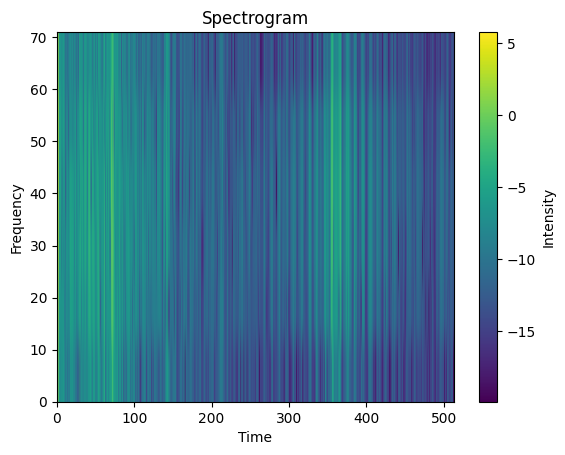

In [36]:
show_and_save_spectrogram_image(
    spectrogram=filtered_delta_delta,
    n_fft=n_fft,
    sample_rate=sample_rate,
    path=None
)

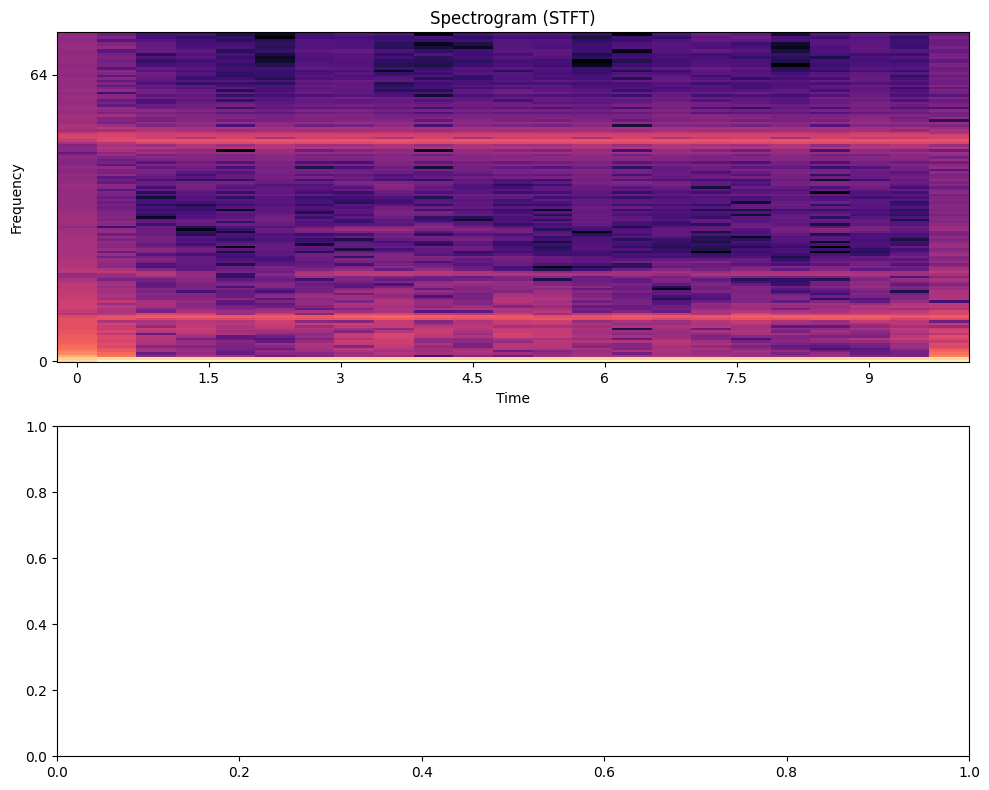

In [37]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

# Load the audio file
y, sr = librosa.load(audio_path, sr=None)  # Load with original sample rate

# Compute the Short-Time Fourier Transform (STFT)
n_fft = 256   # FFT window size
hop_length = 256 // 4  # Hop length
stft = librosa.stft(y, n_fft=n_fft, hop_length=hop_length)

# Convert to log scale (dB) for better visualization
spectrogram = librosa.amplitude_to_db(np.abs(stft), ref=np.max)

# Compute the delta spectrogram (first-order derivative)
#delta_spectrogram = librosa.feature.delta(spectrogram)

# Plot and save the images
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

# Plot STFT Spectrogram
librosa.display.specshow(spectrogram, sr=sr, hop_length=hop_length, x_axis='time', y_axis='log', ax=ax[0])
ax[0].set_title("Spectrogram (STFT)")
ax[0].set_xlabel("Time")
ax[0].set_ylabel("Frequency")

# Plot Delta Spectrogram
#librosa.display.specshow(delta_spectrogram, sr=sr, hop_length=hop_length, x_axis='time', y_axis='log', ax=ax[1])
#ax[1].set_title("Delta Spectrogram")
#ax[1].set_xlabel("Time")
#ax[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

